In [186]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import seaborn as sns # data visualization
import matplotlib.pyplot as plt #drawing
from sklearn.model_selection import train_test_split

## Importing and Exploring Dataset

In [184]:
data = pd.read_csv('../ProjectBookRatingPredictions/DataSet/Train_data.csv',error_bad_lines=False)
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,eng,374,71853,646,1/1/2007,HarperTrophy
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,en-US,384,1051,47,1/1/2002,Avon Books
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,eng,167,1840,245,10/1/2006,Chicken House / Scholastic
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,en-US,80,162,11,3/1/2001,Scholastic Paperbacks
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,eng,393,50169,2117,2/7/2002,Vintage


In [183]:
test = pd.read_csv('../ProjectBookRatingPredictions/DataSet/Test_data.csv',error_bad_lines=False)
test.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,28898,Fundamentals of Heat and Mass Transfer [with I...,Frank P. Incropera/David P. DeWitt,NaN,0470055545,9780470055540,en-US,997,6,0,10/30/2006,Wiley
1,39358,Stud Rites (A Dog Lover's Mystery #9),Susan Conant,NaN,0425201597,9780425201596,eng,237,322,16,3/1/2005,Berkley Prime Crime Books
2,32695,El talismán,Stephen King/Peter Straub/Pilar Giralt Gorina,NaN,8408042432,9788408042433,spa,375,12,1,7/1/2003,Planeta Publishing
3,15096,Five Quarters of the Orange,Joanne Harris,NaN,0060958022,9780060958022,eng,307,26258,1936,6/4/2002,Harper Perennial
4,15428,Up in a Heaval (Xanth #26),Piers Anthony,NaN,0812574990,9780812574999,eng,342,2364,25,10/19/2003,Tor Fantasy


In [60]:
data.describe() # Generate the summary table of the data

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,21266.538300,3.935645,9.763290e+12,336.340000,1.874233e+04,555.690600
std,13081.040856,0.345856,4.035128e+11,234.721368,1.178498e+05,2672.388675
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10230.000000,3.780000,9.780345e+12,194.000000,1.060000e+02,9.000000
50%,20261.000000,3.960000,9.780571e+12,300.000000,7.440000e+02,47.000000
75%,31986.750000,4.130000,9.780872e+12,416.000000,5.005500e+03,241.000000
max,45641.000000,5.000000,9.790008e+12,4736.000000,4.597666e+06,94265.000000


In [61]:
data.info() # Check basic features and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10000 non-null  int64  
 1   title               10000 non-null  object 
 2   authors             10000 non-null  object 
 3   average_rating      10000 non-null  float64
 4   isbn                10000 non-null  object 
 5   isbn13              10000 non-null  int64  
 6   language_code       10000 non-null  object 
 7     num_pages         10000 non-null  int64  
 8   ratings_count       10000 non-null  int64  
 9   text_reviews_count  10000 non-null  int64  
 10  publication_date    10000 non-null  object 
 11  publisher           10000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 937.6+ KB


In [62]:
data.duplicated().any() # Check for doublication

False

## Data Visualisation

Text(0, 0.5, 'Frequency')

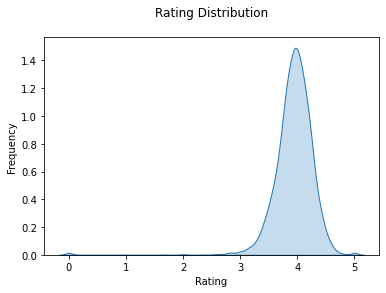

In [63]:
# rating distribution
sns.kdeplot(data['average_rating'],shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

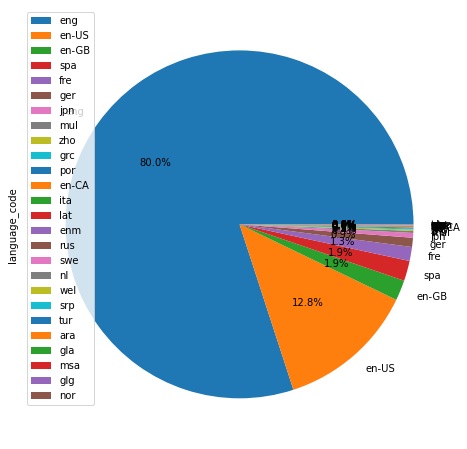

In [76]:
# top 6 languages
data['language_code'].value_counts().head(100).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '3.82'),
  Text(1, 0, '3.83'),
  Text(2, 0, '3.89'),
  Text(3, 0, '3.9'),
  Text(4, 0, '3.92'),
  Text(5, 0, '3.93'),
  Text(6, 0, '3.94'),
  Text(7, 0, '3.96'),
  Text(8, 0, '3.97'),
  Text(9, 0, '3.99'),
  Text(10, 0, '4.0'),
  Text(11, 0, '4.02'),
  Text(12, 0, '4.04'),
  Text(13, 0, '4.05'),
  Text(14, 0, '4.07')])

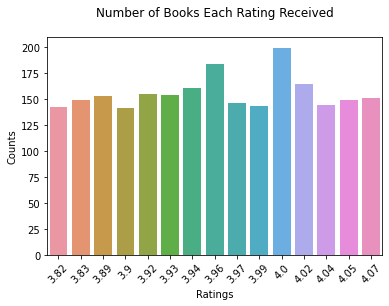

In [65]:
# number of books per rating
sns.barplot(data['average_rating'].value_counts().head(15).index, data['average_rating'].value_counts().head(15))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='title'>

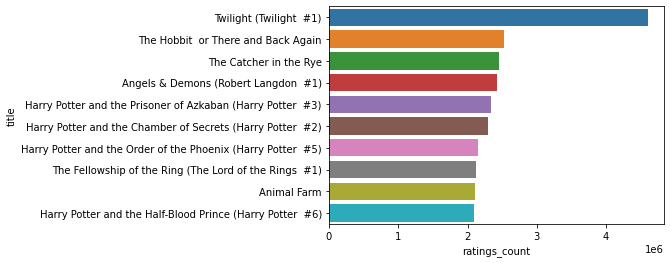

In [68]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

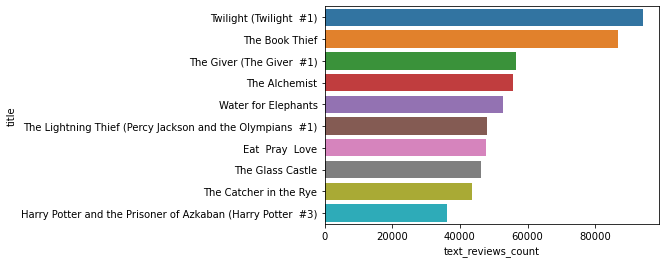

In [70]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Total Ratings')

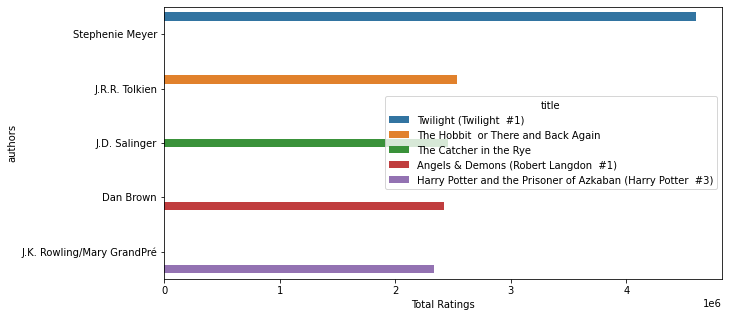

In [72]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'No. of Publications')

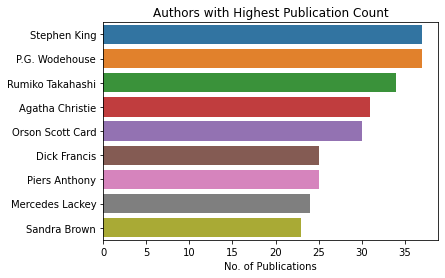

In [74]:
# authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

## Data Cleaning and Feature Engineering

In [199]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
#first unify the english language
encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}}
data.replace(encoding,inplace=True)

#then convert categorical feartures into ordinal integers
enc = OrdinalEncoder()
enc.fit(data[['language_code']])
data[['language_code']] = enc.fit_transform(data[['language_code']])

In [200]:
# convert data type of publication_date from object into date type
data['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') 

In [201]:
#encode title column
le = LabelEncoder()
data['title'] = le.fit_transform(data['title'])

In [202]:
#encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [203]:
#encode publisher
data['publisher'] = le.fit_transform(data['publisher'])

In [204]:
#encode pubilication_date
data['publication_date'] = le.fit_transform(data['publication_date'])

In [205]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,8253,3734,3399,4.19,0060885432,9780060885434,1.0,374,71853,646,3161,865
1,11101,2331,883,3.81,0380818957,9780380818952,1.0,384,1051,47,2031,157
2,28193,9012,970,3.76,043978204X,9780439782043,1.0,167,1840,245,3102,371
3,25047,6304,2578,3.83,0439114284,9780439114288,1.0,80,162,11,1862,1672
4,17800,1576,2128,4.04,0099448769,9780099448761,1.0,393,50169,2117,2053,2008


## Creating Model

In [206]:
X = data.drop(['bookID','average_rating','isbn','isbn13','publication_date'],axis = 1)
y = data['average_rating']

In [207]:
X.head(5)

,title,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher
0,3734,3399,1.0,374,71853,646,865
1,2331,883,1.0,384,1051,47,157
2,9012,970,1.0,167,1840,245,371
3,6304,2578,1.0,80,162,11,1672
4,1576,2128,1.0,393,50169,2117,2008


In [208]:
y.head(5)

0    4.19
1    3.81
2    3.76
3    3.83
4    4.04
Name: average_rating, dtype: float64

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [210]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [211]:
predictions = lr.predict(X_test)

In [212]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.93,3.959233
1,3.86,3.929873
2,3.48,3.909017
3,3.63,3.887137
4,3.56,3.912388
5,4.32,3.901829
6,3.92,3.948370
7,4.08,3.876768
8,4.11,3.934666
9,3.70,3.934843


In [213]:
# evaluate the performance of the algorithm
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))#平均绝对误差
print('MSE:', metrics.mean_squared_error(y_test, predictions))#均方误差
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#均方根误差

MAE: 0.22532615556517335
MSE: 0.11285719287847736
RMSE: 0.3359422463437389
